# logistic regression
Logistic regression is a supervised learning algorithm used to predict a dependent categorical target variable. In essence, if you have a large set of data that you want to categorize, logistic regression may be able to help.

# Types of logistic regression
## Binary logistic regression
This concept is typically represented as a 0 or a 1 in coding.

Examples include:

Whether or not to lend to a bank customer (outcomes are yes or no). 
Assessing cancer risk (outcomes are high or low). 
Will a team win tomorrow’s game (outcomes are yes or no).

## Multinomial logistic regression
Is a model where there are multiple classes that an item can be classified as. 
There is a set of three or more predefined classes set up prior to running the model.

Examples include:

Classifying texts into what language they come from. 
Predicting whether a student will go to college, trade school or into the workforce. 
Does your cat prefer wet food, dry food or human food?

## Ordinal logistic regression
Ordinal logistic regression is also a model where there are multiple classes that an item can be classified as; however, in this case an ordering of classes is required. Classes do not need to be proportionate. The distance between each class can vary.

Examples include:

Ranking restaurants on a scale of 0 to 5 stars. 
Scores on a math test: Outcomes = Poor/Average/Good. 





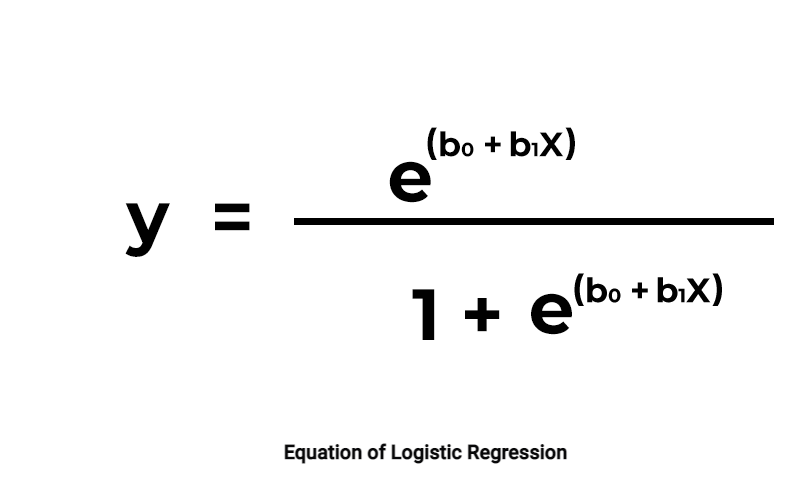
![image.png](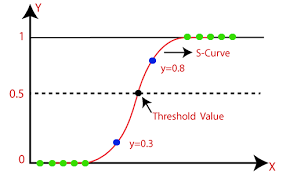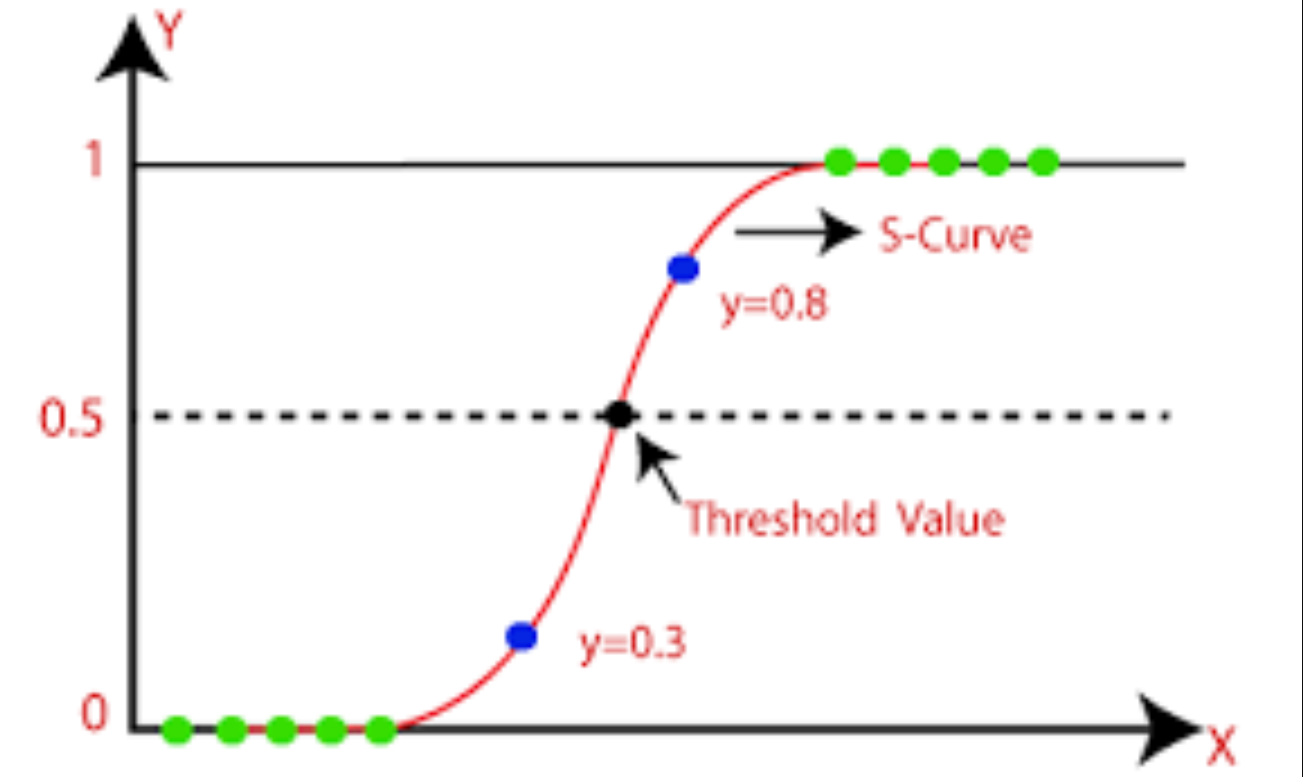)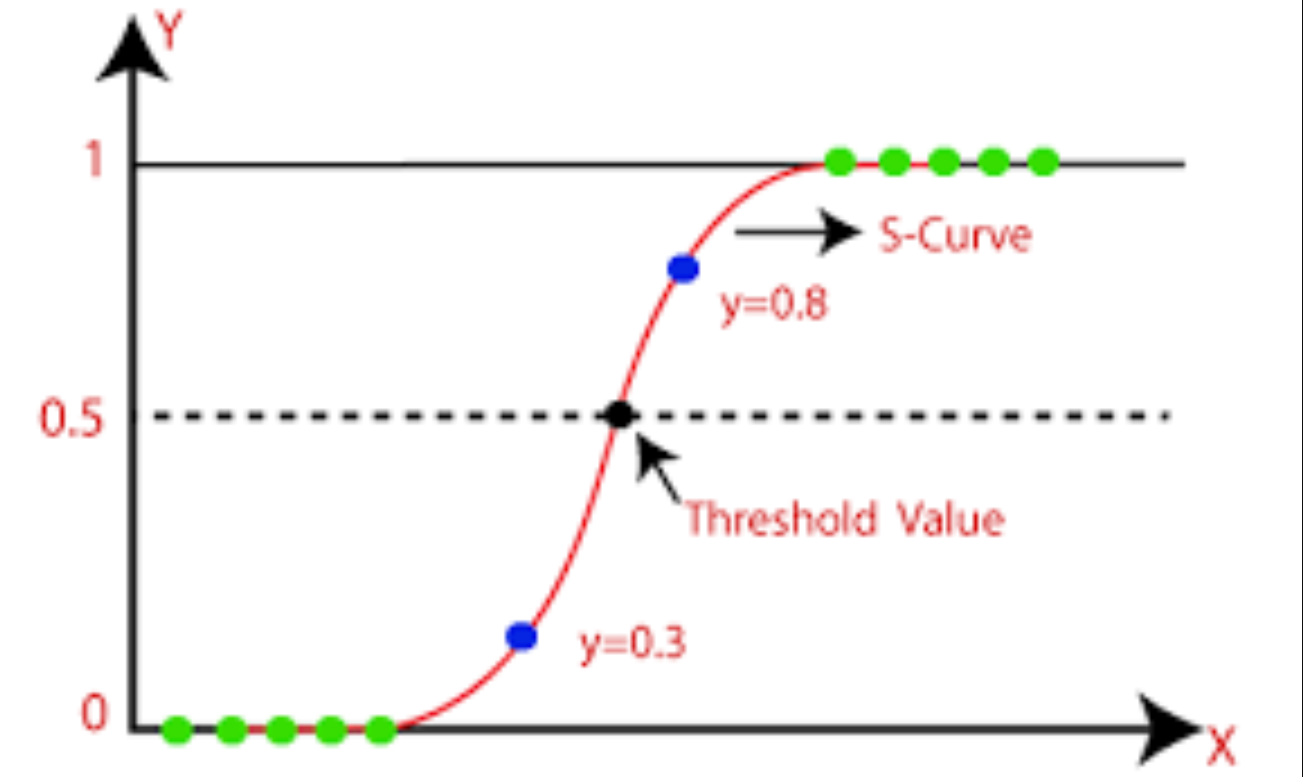

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [74]:
df = pd.read_csv('titanic_train.csv')

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

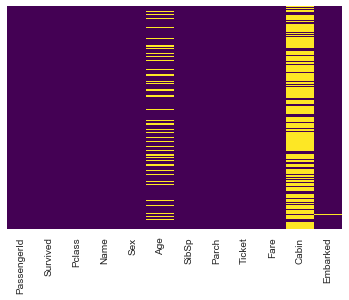

In [76]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

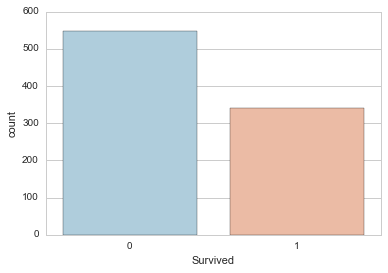

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df,palette='RdBu_r')

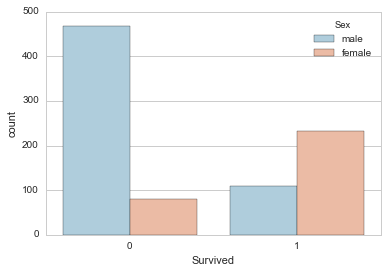

In [78]:
# visualize the number of Survived by sex


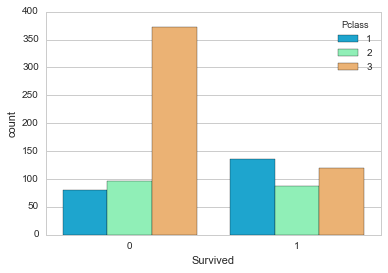

In [79]:
# visualize the number of Survived by Pclass with palette='rainbow'


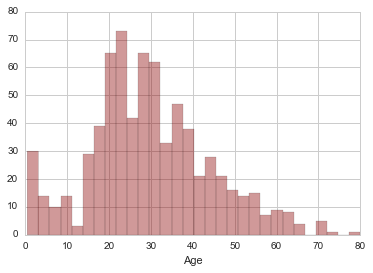

In [80]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

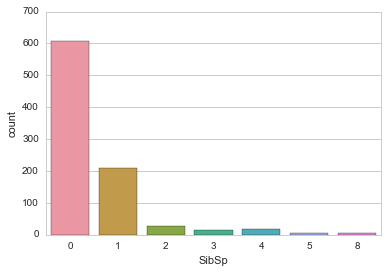

In [82]:
sns.countplot(x='SibSp',data=df)

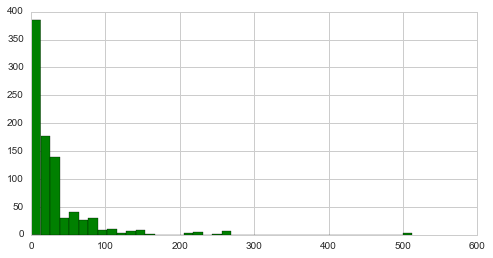

In [83]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning

![image.png]()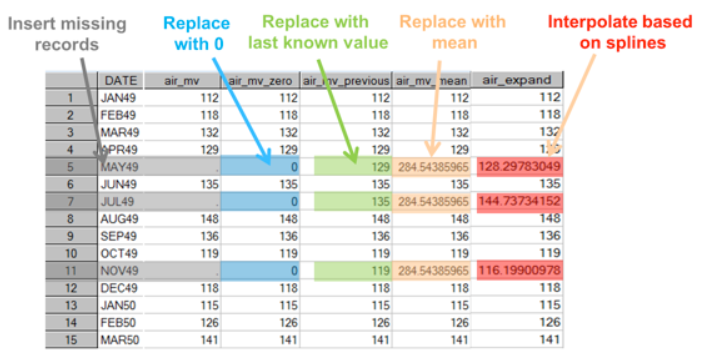

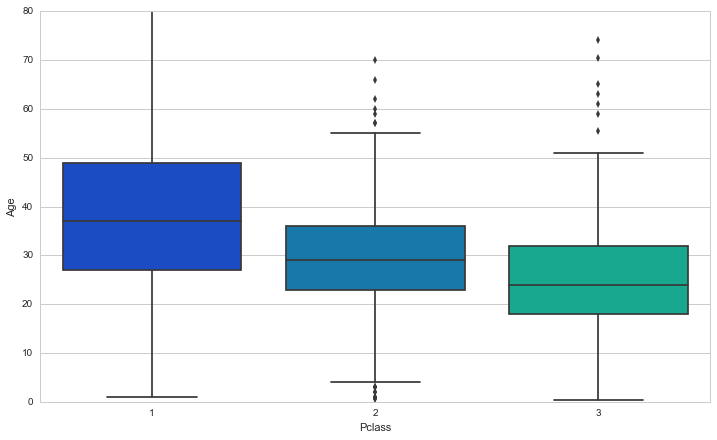

In [86]:
plt.figure(figsize=(12, 7))
# Replace Y , X with the most appropriate features
y=''
x=''
sns.boxplot(x,y,data=df,palette='winter')

In [87]:
def impute_age(cols):
    Age = cols[0]
    # The second feature 
    
    if pd.isnull(Age):

        if  :
            return 

        elif :
            return 

        else:
            return 

    else:
        return Age

Now apply that function!

In [88]:
df['Age'] = df[['','']].apply(impute_age,axis=1)

Now let's check that heat map again!

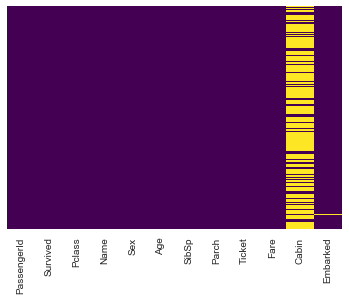

In [89]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [90]:
df.drop('Cabin',axis=1,inplace=True)

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [92]:
df.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [94]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [95]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [96]:
df = pd.concat([df,sex,embark],axis=1)

In [97]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [98]:
from sklearn.model_selection import train_test_split

In [100]:
# Select the features, targets, and split the data for training and testing data
feature_columns=''
target=''
X_train, X_test, y_train, y_test = 

## Training and Predicting

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
#train the model
Model = LogisticRegression()


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
#Predict whether he is Survived or not


Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report())

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267





## Great Job!